<a href="https://colab.research.google.com/github/davidianho/Data-collection/blob/master/Times_series_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [52]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [53]:
df[ "FullDate" ] = pd.to_datetime(  df[ "FullDate" ], format = '%Y-%m-%d %H:%M:%S') #convert column to datetime
df.set_index( "FullDate" , inplace= True )

In [54]:
# Downsample to daily data points
df_daily = df.resample('D' ).sum()

Text(0, 0.5, 'ElecPrice')

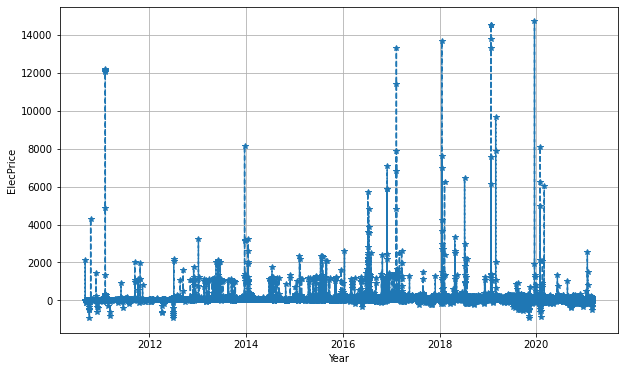

In [55]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'ElecPrice' )

In [56]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'SysLoad' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )
#results in

ADF Statistic: -18.17067542641451
p-value: 2.4474966090684217e-30 
No. of lags used: 67 
No. of observations used : 91948 
Critical Values:
 1% : -3.430421121531399 
 5% : -2.861571434572286 
 10% : -2.566786731528145 


In [57]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'GasPrice' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )
#results in

ADF Statistic: -6.793388065452667
p-value: 2.3337605343636574e-09 
No. of lags used: 48 
No. of observations used : 91967 
Critical Values:
 1% : -3.430421106837576 
 5% : -2.86157142807793 
 10% : -2.566786728071412 


In [58]:
!pip install pystan~=2.14
!pip install fbprophet

from fbprophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
df =  df_daily.reset_index()

In [60]:
# indexing the target columns 
new_df = df[['FullDate', 'ElecPrice']]
new_df = new_df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

In [61]:
# splitin the dataset
train = new_df.iloc[:2757]
test = new_df.iloc[2757:]

In [62]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
# drop y in test ds
test_ds = test.drop('y', axis = 1).reset_index(drop = True)

In [64]:
forecast = model.predict(test_ds)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2536.337494,52.456151,4851.648700,2691.764386,2691.764386,2691.764386
1,2018-03-21,2689.655459,407.225941,4989.657975,2692.580955,2692.580955,2692.580955
2,2018-03-22,2788.705741,434.648161,5078.269818,2693.397524,2693.397524,2693.397524
3,2018-03-23,2580.977221,145.633842,4747.975843,2694.214093,2694.214093,2694.214093
4,2018-03-24,2256.367941,-85.775113,4733.695925,2695.030663,2695.030663,2695.030663
...,...,...,...,...,...,...,...
1072,2021-02-24,3475.863766,563.938955,6236.472833,3567.126543,2073.625980,5176.468553
1073,2021-02-25,3542.743730,723.293348,6536.304345,3567.943112,2072.959252,5178.277908
1074,2021-02-26,3309.660718,358.182071,6254.088910,3568.759681,2072.322885,5180.896516
1075,2021-02-27,2966.465610,65.112941,5914.976831,3569.576250,2071.518611,5184.117719


In [65]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_actual = test['y']
y_predicted = forecast['yhat']
y_predicted = y_predicted.astype(int)
print(f'mean_absolute_error : {mean_absolute_error(y_actual, y_predicted)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_actual, y_predicted)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_actual, y_predicted))}')

mean_absolute_error : 1748.1345543175487
mean_absolute_percentage_error: 5.493810420507002
RMSE: 3217.9474852532553


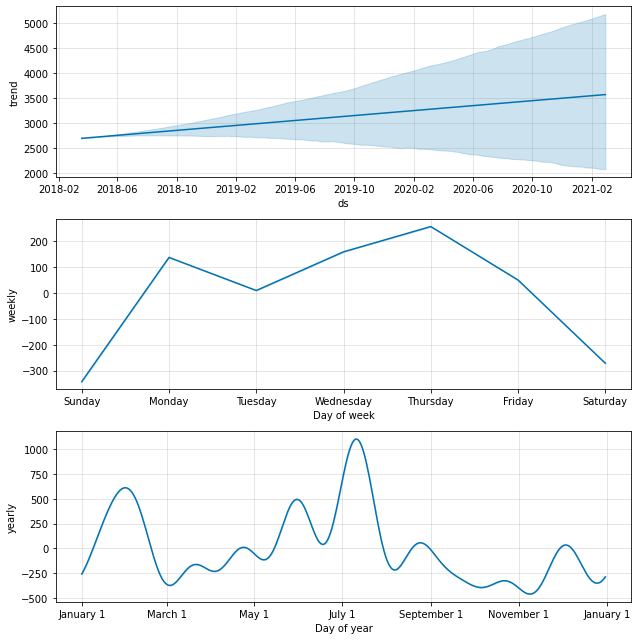

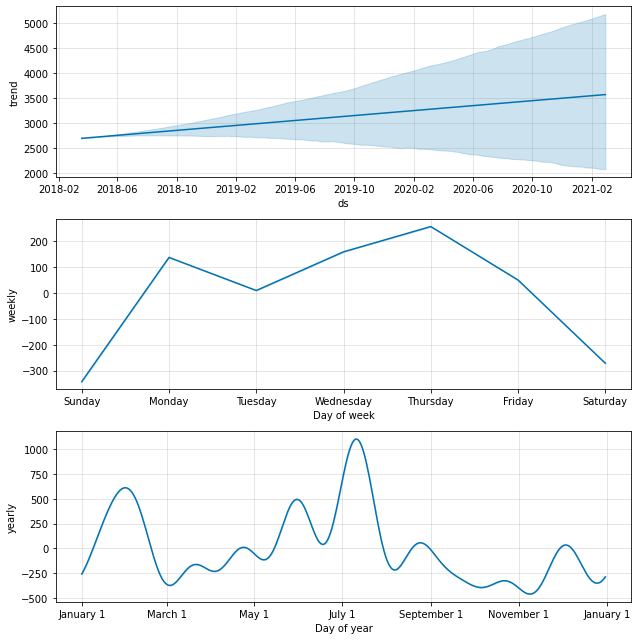

In [66]:
model.plot_components(forecast)

**Multivariate**

In [67]:
mv_df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y", "SysLoad": "add1", "Tmax" : "add2", "GasPrice":  "add3" })

In [68]:
# splitin the dataset
mv_train = mv_df.iloc[:2757]
mv_test = mv_df.iloc[2757:]

In [69]:
mv_model = Prophet( )
mv_model.add_regressor('add1')
mv_model.add_regressor('add2')
mv_model.add_regressor('add3')

mv_model.fit(mv_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
# drop y in test ds
mv_test_ds = mv_test.drop('y', axis = 1).reset_index(drop = True)

In [71]:
mv_forecast = mv_model.predict(mv_test_ds)
mv_forecast.head()
mv_forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1985.365644,-137.305351,4214.530615,1866.664112,1866.664112,1866.664112
1,2018-03-21,1976.703318,-156.824755,4212.312213,1867.349885,1867.349885,1867.349885
2,2018-03-22,2897.096666,658.388010,4942.185166,1868.035658,1868.035658,1868.035658
3,2018-03-23,2581.305545,318.938697,4890.528507,1868.721432,1868.721432,1868.721432
4,2018-03-24,1434.385996,-802.793654,3583.487821,1869.407205,1869.407205,1869.407205
...,...,...,...,...,...,...,...
1072,2021-02-24,953.579564,-1379.716244,3204.300564,2601.813038,1853.162518,3353.393579
1073,2021-02-25,1313.293701,-1057.965865,3798.083346,2602.498811,1853.057280,3355.810900
1074,2021-02-26,1377.207811,-983.678410,3636.454025,2603.184585,1852.952042,3358.228221
1075,2021-02-27,1032.064004,-1385.213659,3367.386063,2603.870358,1852.685742,3360.645542


In [74]:
from sklearn.metrics import mean_absolute_error

mv_y_actual = mv_test['y']
mv_y_predicted = mv_forecast['yhat']
mv_y_predicted = mv_y_predicted.astype(int)
print(f'mean_absolute_error : {mean_absolute_error(mv_y_actual, mv_y_predicted)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(mv_y_actual, mv_y_predicted)}')
print(f'RMSE: {np.sqrt(mean_squared_error(mv_y_actual, mv_y_predicted))}')

mean_absolute_error : 983.2989275766017
mean_absolute_percentage_error: 2.3120181607382353
RMSE: 2706.802951369261


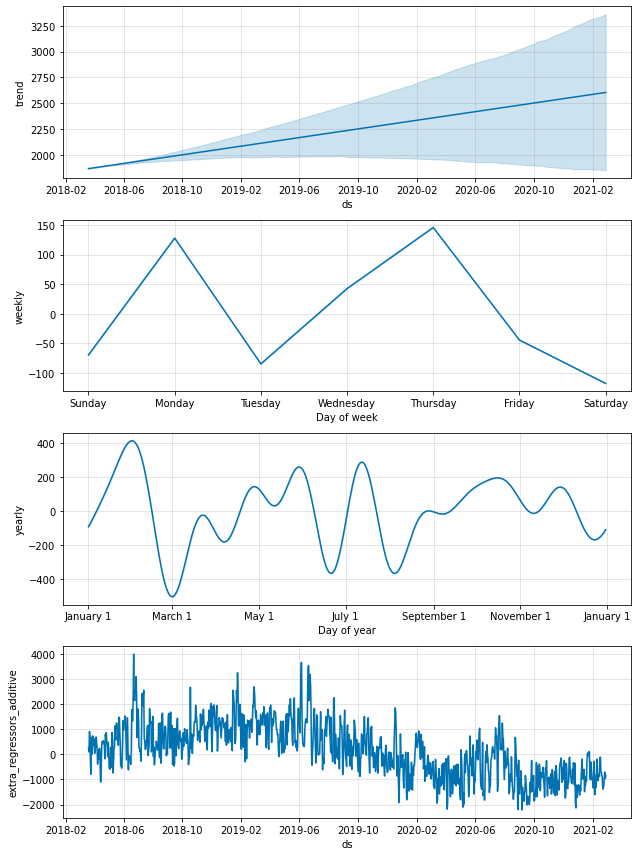

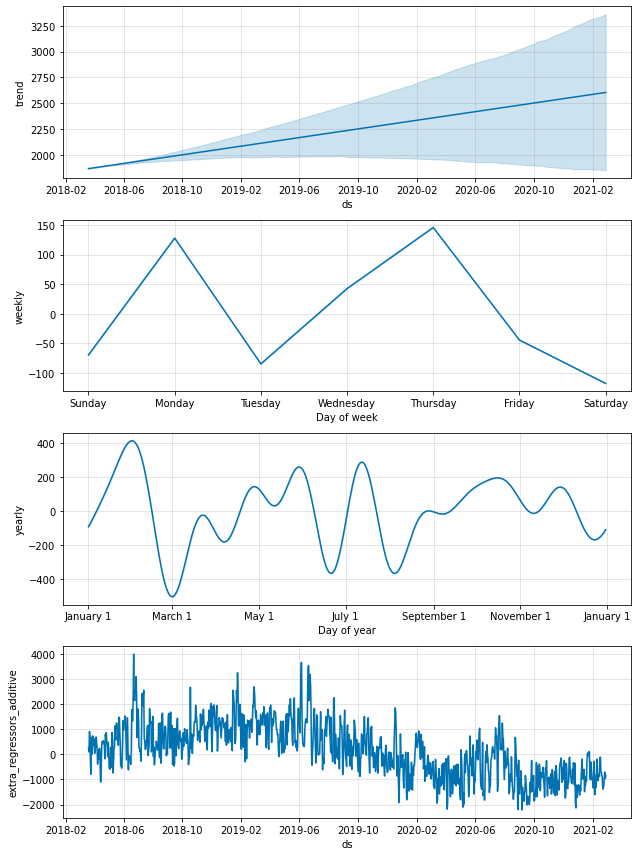

In [75]:
mv_model.plot_components(mv_forecast)

In [77]:
new = df.drop("Tmax", axis = 1)
new_df = new.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y", "SysLoad": "add1", "GasPrice":  "add2" })

# splitin the dataset
v_train = new_df.iloc[:2757]
v_test = new_df.iloc[2757:]


v_model = Prophet( )
v_model.add_regressor('add1')
v_model.add_regressor('add2')


v_model.fit(v_train)


# drop y in test ds
v_test_ds = v_test.drop('y', axis = 1).reset_index(drop = True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
v_forecast = v_model.predict(v_test_ds)
v_forecast.head()
v_forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1990.109647,-182.735780,4136.904554,1871.211040,1871.211040,1871.211040
1,2018-03-21,1981.488181,-337.539726,4295.240616,1871.907673,1871.907673,1871.907673
2,2018-03-22,2901.407643,526.149237,5094.691092,1872.604305,1872.604305,1872.604305
3,2018-03-23,2586.203182,301.265745,4627.949645,1873.300938,1873.300938,1873.300938
4,2018-03-24,1438.676772,-842.615500,3764.356061,1873.997570,1873.997570,1873.997570
...,...,...,...,...,...,...,...
1072,2021-02-24,968.851787,-1436.289917,3189.260743,2618.001005,1829.471351,3307.388602
1073,2021-02-25,1328.118956,-1122.056496,3609.420611,2618.697637,1829.536354,3309.057972
1074,2021-02-26,1392.695630,-1091.261700,3689.556074,2619.394269,1829.211748,3311.861984
1075,2021-02-27,1047.062976,-1226.293930,3461.765705,2620.090902,1828.887143,3314.846389


In [79]:
mv_y_actual = mv_test['y']
v_y_predicted = v_forecast['yhat']
v_y_predicted = v_y_predicted.astype(int)
print(f'mean_absolute_error : {mean_absolute_error(mv_y_actual, v_y_predicted)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(mv_y_actual, v_y_predicted)}')
print(f'RMSE: {np.sqrt(mean_squared_error(mv_y_actual, v_y_predicted))}')

mean_absolute_error : 992.5560492107707
mean_absolute_percentage_error: 2.336271502094532
RMSE: 2709.6135650641395
